In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
train_set = pd.read_csv('../data/subset_train_OHE.csv')
test_set = pd.read_csv('../data/subset_test_OHE.csv')

In [5]:
print(train_set.shape)
print(test_set.shape)

(81309, 360)
(27103, 263)


In [6]:
train_set.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'row_id', 'is_security_73',
       'is_security_102', 'is_security_18', 'p_tcount', 'p_value',
       'trade_vwap', 'trade_volume', 'is_buyer', 'is_seller',
       'transtype1_is_T', 'transtype1_is_Q', 'time1', 'bid1', 'ask1',
       'transtype2_is_T', 'transtype2_is_Q', 'time2', 'bid2', 'ask2',
       'transtype3_is_T', 'transtype3_is_Q', 'time3', 'bid3', 'ask3',
       'transtype4_is_T', 'transtype4_is_Q', 'time4', 'bid4', 'ask4',
       'transtype5_is_T', 'transtype5_is_Q', 'time5', 'bid5', 'ask5',
       'transtype6_is_T', 'transtype6_is_Q', 'time6', 'bid6', 'ask6',
       'transtype7_is_T', 'transtype7_is_Q', 'time7', 'bid7', 'ask7',
       'transtype8_is_T', 'transtype8_is_Q', 'time8', 'bid8', 'ask8',
       'transtype9_is_T', 'transtype9_is_Q', 'time9', 'bid9', 'ask9',
       'transtype10_is_T', 'transtype10_is_Q', 'time10', 'bid10', 'ask10',
       'transtype11_is_T', 'transtype11_is_Q', 'time11', 'bid11', 'ask11',
       'transtype12_is_T',

In [8]:
bid_column_names = []
ask_column_names = []
for column in train_set.columns.values:
    if column.startswith('bid'):
        bid_column_names.append(column)
    elif column.startswith('ask'):
        ask_column_names.append(column)
        
print(bid_column_names)
print(ask_column_names)

['bid1', 'bid2', 'bid3', 'bid4', 'bid5', 'bid6', 'bid7', 'bid8', 'bid9', 'bid10', 'bid11', 'bid12', 'bid13', 'bid14', 'bid15', 'bid16', 'bid17', 'bid18', 'bid19', 'bid20', 'bid21', 'bid22', 'bid23', 'bid24', 'bid25', 'bid26', 'bid27', 'bid28', 'bid29', 'bid30', 'bid31', 'bid32', 'bid33', 'bid34', 'bid35', 'bid36', 'bid37', 'bid38', 'bid39', 'bid40', 'bid41', 'bid42', 'bid43', 'bid44', 'bid45', 'bid46', 'bid47', 'bid48', 'bid49', 'bid50', 'bid52', 'bid53', 'bid54', 'bid55', 'bid56', 'bid57', 'bid58', 'bid59', 'bid60', 'bid61', 'bid62', 'bid63', 'bid64', 'bid65', 'bid66', 'bid67', 'bid68', 'bid69', 'bid70', 'bid71', 'bid72', 'bid73', 'bid74', 'bid75', 'bid76', 'bid77', 'bid78', 'bid79', 'bid80', 'bid81', 'bid82', 'bid83', 'bid84', 'bid85', 'bid86', 'bid87', 'bid88', 'bid89', 'bid90', 'bid91', 'bid92', 'bid93', 'bid94', 'bid95', 'bid96', 'bid97', 'bid98', 'bid99', 'bid100']
['ask1', 'ask2', 'ask3', 'ask4', 'ask5', 'ask6', 'ask7', 'ask8', 'ask9', 'ask10', 'ask11', 'ask12', 'ask13', 'ask14'

In [9]:
plot_margin = 0.25

Text(0.5,1,'Limit Order for Security-18')

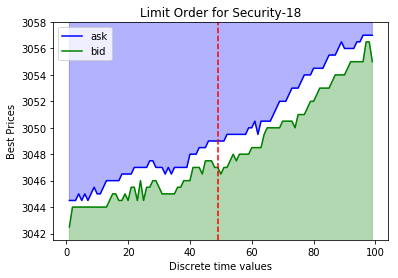

In [23]:
#visualizing a day's bid-ask data for one security
time_period = range(1, 100)
bid_values = np.array(train_set[20:21][bid_column_names]).flatten('F')
ask_values = np.array(train_set[20:21][ask_column_names]).flatten('F')

plt.plot(time_period, ask_values, label='ask', color='b')
plt.plot(time_period, bid_values, label='bid', color='g')

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))

plt.axvline(x=49, color='r', linestyle='--')

plt.fill_between(time_period, ask_values, ask_values*10, interpolate=True, color='b', alpha=0.3)
plt.fill_between(time_period, 0, bid_values, interpolate=True, color='g', alpha=0.3)

plt.xlabel('Discrete time values')
plt.ylabel('Best Prices')

plt.legend()
plt.title('Limit Order for Security-18')

Text(0.5,1,'Spread behavior for Security-18 (in one row)')

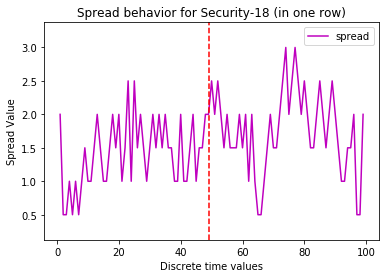

In [24]:
spread_values = ask_values - bid_values

plt.plot(time_period, spread_values, label='spread', color='m')

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))

plt.axvline(x=49, color='r', linestyle='--')

plt.xlabel('Discrete time values')
plt.ylabel('Spread Value')

plt.legend()
plt.title('Spread behavior for Security-18 (in one row)')

In [25]:
security18 = train_set[train_set['is_security_18'] == 1]
security73 = train_set[train_set['is_security_73'] == 1]
security102 = train_set[train_set['is_security_102'] == 1]

In [30]:
changes_bid = np.zeros((train_set.shape[0], 50))
changes_ask = np.zeros((train_set.shape[0], 50))
index_row = 0
for ix, row in train_set.iterrows():
    index_column = 0

    change = math.fabs(row[('bid' + str(50))] - row[('bid' + str(52))])
    changes_bid[index_row][index_column] = change
    change = math.fabs(row[('ask' + str(50))] - row[('ask' + str(52))])
    changes_ask[index_row][index_column] = change
    index_column = index_column+1
    for i in range(53, 101):
        change = math.fabs(row[('bid' + str(i-1))] - row[('bid' + str(i))])
        changes_bid[index_row][index_column] = change
        change = math.fabs(row[('ask' + str(i-1))] - row[('ask' + str(i))])
        changes_ask[index_row][index_column] = change
        index_column = index_column+1
        
    index_row = index_row+1

In [31]:
changes_bid = np.mean(changes_bid, axis=0)
changes_ask = np.mean(changes_ask, axis=0)

In [32]:
from scipy.interpolate import interp1d #for smooth line plots

In [33]:
changes_bid = interp1d(range(0, 50), changes_bid, kind='cubic')
changes_ask = interp1d(range(0, 50), changes_ask, kind='cubic')

Text(0.5,1,'Bid-Ask change behavior after Liquidity Shock')

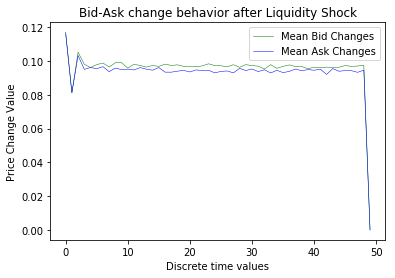

In [34]:
x_axis = range(0, 50)
y_changes_bid = changes_bid(x_axis)
y_changes_ask = changes_ask(x_axis)

plt.plot(x_axis, y_changes_bid, label='Mean Bid Changes', color='g', linewidth=0.5)
plt.plot(x_axis, y_changes_ask, label='Mean Ask Changes', color='b', linewidth=0.5)

plt.xlabel('Discrete time values')
plt.ylabel('Price Change Value')

plt.legend()
plt.title('Bid-Ask change behavior after Liquidity Shock')